In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
Dataset_path="Downloads/exam"
IMG_SIZE=(224,224)
SEED=42
BATCH_SIZE=32

In [5]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    Dataset_path,
    subset="training",
    validation_split=0.3,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED)

full_valid_ds=tf.keras.preprocessing.image_dataset_from_directory(
    Dataset_path,
    subset="validation",
    validation_split=0.3,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED)

train_size=len(train_ds)
val_size=len(full_valid_ds)//2
test_size=len(full_valid_ds)-val_size

valid_ds=full_valid_ds.take(val_size)
test_ds=full_valid_ds.take(val_size)



Found 1000 files belonging to 2 classes.
Using 700 files for training.
Found 1000 files belonging to 2 classes.
Using 300 files for validation.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model=Sequential([
    Conv2D(32, (2,2), input_shape=(224,224,3), activation='relu'),
    MaxPooling2D((3,3)),
    Conv2D(128, (2,2), activation='relu'),
    MaxPooling2D((3,3)),
    Conv2D(64, (2,2), activation='relu'),
    MaxPooling2D((3,3)),
    Conv2D(32, (2,2), activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 73, 73, 128)       16512     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 64)        32832     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0

In [7]:
history=model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=10)

Epoch 1/10
22/22 [==============================] - 20s 850ms/step - loss: 5.3712 - accuracy: 0.4929 - val_loss: 0.7719 - val_accuracy: 0.5750
Epoch 2/10
22/22 [==============================] - 16s 707ms/step - loss: 0.7169 - accuracy: 0.5414 - val_loss: 0.6827 - val_accuracy: 0.5500
Epoch 3/10
22/22 [==============================] - 16s 724ms/step - loss: 0.6891 - accuracy: 0.5243 - val_loss: 0.6910 - val_accuracy: 0.6062
Epoch 4/10
22/22 [==============================] - 16s 719ms/step - loss: 0.6753 - accuracy: 0.5557 - val_loss: 0.7066 - val_accuracy: 0.5312
Epoch 5/10
22/22 [==============================] - 16s 715ms/step - loss: 0.6543 - accuracy: 0.5914 - val_loss: 0.7252 - val_accuracy: 0.5188
Epoch 6/10
22/22 [==============================] - 16s 725ms/step - loss: 0.6462 - accuracy: 0.5957 - val_loss: 0.6976 - val_accuracy: 0.5375
Epoch 7/10
22/22 [==============================] - 16s 722ms/step - loss: 0.6321 - accuracy: 0.6157 - val_loss: 0.7094 - val_accuracy: 0.5625

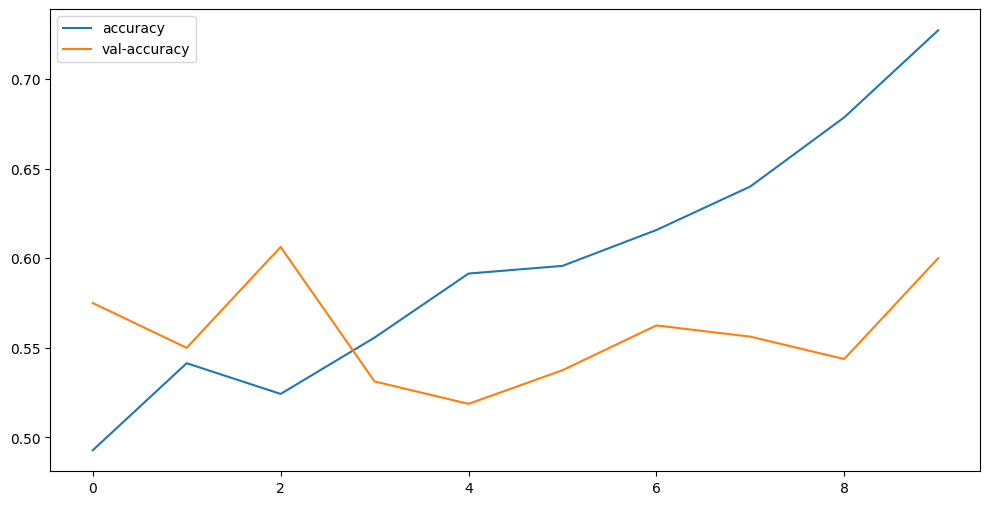

In [9]:
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val-accuracy')
plt.legend()
plt.show()